In [1]:
import os 
import pandas as pd
import numpy as np
import subprocess
import glob
import pybedtools as pbt 
from IPython.display import HTML
import seaborn as sns 
import matplotlib.pyplot as plt
pd.set_option('display.min_rows', 100) 
pd.set_option('display.max_columns', None)
pd.options.mode.chained_assignment = None  # default='warn'

pbt.set_bedtools_path('/mnt/BioHome/jreyna/software/anaconda3/envs/hic_tls/bin/')
pbt.set_tempdir('/mnt/hpcscratch/jreyna/')
os.chdir('/mnt/BioHome/jreyna/jreyna/projects/dchallenge/')

gsizes = 'results/refs/hg19/hg19.chrom.sizes'
res = 5000

# make the directory to save our data
outdir = 'results/main/eqtl/dummy_plots/'
os.makedirs(outdir, exist_ok=True)

In [3]:
import numpy as np

In [174]:
# generate trend for trendd plot
major_homo = np.random.normal(10, 4, 30)
major_het = np.random.normal(20, 4, 30)
minor_homo = np.random.normal(30, 4, 30)

trend = pd.DataFrame([major_homo, major_het, minor_homo]).T
trend.columns = ['AA', 'AC', 'CC']
trend = trend.melt()
trend['num'] = trend['variable'].replace({'AA': 0, 'AC': 1, 'CC': 2})

In [175]:
# generate data for line plot
line = [[-0.1, 9], [0,10], [1,20], [2,30], [2.1, 31]]
line = pd.DataFrame(line)
line.columns = ['num', 'value']

In [176]:
color_fn = 'results/refs/dice_colors/colors.revised.t1d-project.tsv'
colors = pd.read_table(color_fn)

# add th file name designations
cline_filenames = {'CM': 'monocyte_naive', 'BN': 'B-cell_naive',
                   'CD4N': 'CD4_T-cell_naive', 'CD8N': 'CD8_T-cell_naive'}
colors['filename'] = colors.cline.map(cline_filenames)
colors_dict = {sr.filename: sr.hex for i, sr in colors.iterrows()}

In [184]:
colors_dict

{'monocyte_naive': '#B22222',
 'B-cell_naive': '#32CD32',
 'CD4_T-cell_naive': '#00BFFF',
 'CD8_T-cell_naive': '#EE82EE'}

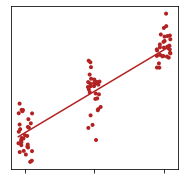

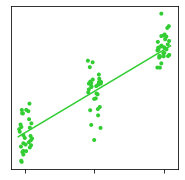

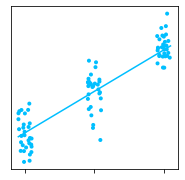

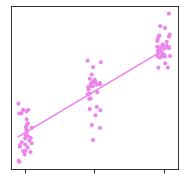

In [183]:
for celltype, color in colors_dict.items():
    
    
    # plot the trend plot + line plot
    fig, ax = plt.subplots(figsize=(3,3))

    sns.stripplot(x='num', y='value', data=trend, size=4, color=color, ax=ax)
    sns.lineplot(x='num', y='value', data=line, color=color, ax=ax)

    ax.set_xlabel('')
    #ax.set_ylabel('Expression Levels')
    ax.set_ylabel('')
    #ax.set_xticklabels(['AA', 'AC', 'CC'])
    ax.set_xticklabels(['', '', ''])

    ax.set_yticks([])
    
    fn = os.path.join(outdir, '{}.svg'.format(celltype))
    fig.savefig(fn)

In [ ]:


hichip_summary_fn = os.path.join(outdir, 'eqtl_eqtl_sum_summary.svg')
fig.savefig(hichip_summary_fn)